In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [37]:
orders = pd.read_csv('../data/blinkit_orders.csv')
order_items = pd.read_csv('../data/blinkit_order_items.csv')
products = pd.read_csv('../data/blinkit_products.csv')
customers = pd.read_csv('../data/blinkit_customers.csv')
inventory = pd.read_csv('../data/blinkit_inventory.csv')
marketing = pd.read_csv('../data/blinkit_marketing_performance.csv')
feedback = pd.read_csv('../data/blinkit_customer_feedback.csv')
delivery = pd.read_csv('../data/blinkit_delivery_performance.csv')



In [14]:
# Quick check on Orders
print("Orders:\n")
print(orders.info())
print(orders.head())

#Check on Order Items
print("\nOrder Items:\n")
print(order_items.info())
print(order_items.head())


Orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB
None
     order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  202

In [44]:
#Convert date columns
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['promised_delivery_time'] = pd.to_datetime(orders['promised_delivery_time'])
orders['actual_delivery_time'] = pd.to_datetime(orders['actual_delivery_time'])

#Merge order_items with orders
merged_df = pd.merge(order_items, orders, on='order_id', how='left')

#Add item total column
merged_df['item_total'] = merged_df['quantity'] * merged_df['unit_price']

#Preview merged data
merged_df.head()


,order_id,product_id,quantity,unit_price,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,item_total
0,1961864118,642612,3,517.03,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,1551.09
1,1549769649,378676,1,881.42,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,881.42
2,9185164487,741341,2,923.84,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,1847.68
3,9644738826,561860,1,874.78,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,874.78
4,5427684290,602241,2,976.55,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,1953.10


In [45]:
#Key Performance Indicators
total_revenue = merged_df['item_total'].sum()
total_orders = merged_df['order_id'].nunique()
total_products_sold = merged_df['quantity'].sum()
average_order_value = total_revenue / total_orders

#Display KPIs
print("📊 SALES INSIGHTS")
print(f"Total Revenue (₹): {round(total_revenue, 2)}")
print(f"Total Unique Orders: {total_orders}")
print(f"Total Products Sold: {total_products_sold}")
print(f"Average Order Value (₹): {round(average_order_value, 2)}")


📊 SALES INSIGHTS
Total Revenue (₹): 4972415.43
Total Unique Orders: 5000
Total Products Sold: 10034
Average Order Value (₹): 994.48


In [17]:
# Create a daily summary DataFrame
daily_sales = merged_df.groupby(merged_df['order_date'].dt.date).agg({
    'order_id': 'nunique',
    'item_total': 'sum'
}).reset_index()

# Rename columns
daily_sales.columns = ['order_date', 'total_orders', 'total_revenue']
daily_sales.head()


,order_date,total_orders,total_revenue
0,2023-03-16,9,7257.89
1,2023-03-17,6,4193.24
2,2023-03-18,7,9591.13
3,2023-03-19,7,8379.42
4,2023-03-20,4,2531.09


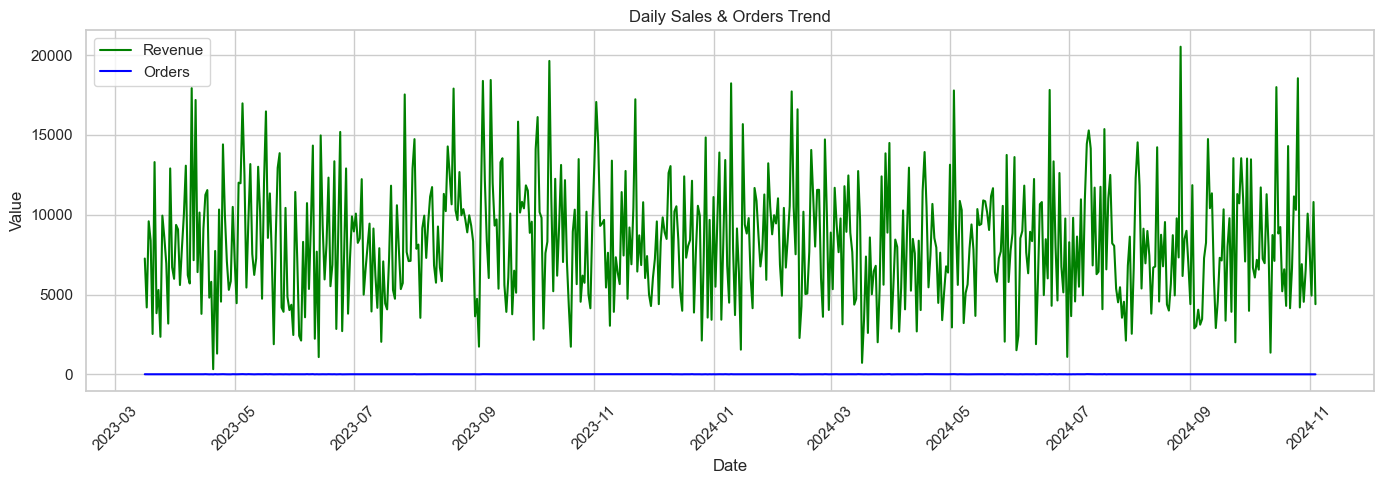

In [46]:
plt.figure(figsize=(14, 5))

# Line plot of total revenue
plt.plot(daily_sales['order_date'], daily_sales['total_revenue'], label='Revenue', color='green')

# Line plot of total orders
plt.plot(daily_sales['order_date'], daily_sales['total_orders'], label='Orders', color='blue')

plt.title("Daily Sales & Orders Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Create a month-year column
merged_df['order_month'] = merged_df['order_date'].dt.to_period('M')

# Monthly trend summary
monthly_sales = merged_df.groupby('order_month').agg({
    'order_id': 'nunique',
    'item_total': 'sum'
}).reset_index()

monthly_sales.columns = ['order_month', 'total_orders', 'total_revenue']
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)  # for plotting
monthly_sales.head()


,order_month,total_orders,total_revenue
0,2023-03,120,110989.65
1,2023-04,238,249382.54
2,2023-05,276,269445.26
3,2023-06,232,233672.95
4,2023-07,244,237060.98


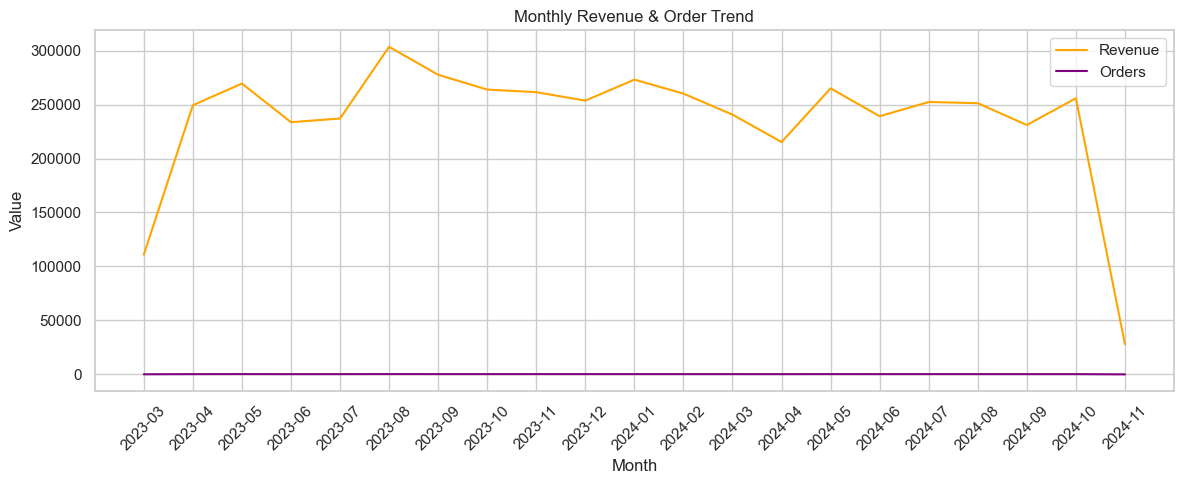

In [47]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=monthly_sales, x='order_month', y='total_revenue', label='Revenue', color='orange')
sns.lineplot(data=monthly_sales, x='order_month', y='total_orders', label='Orders', color='purple')

plt.title("Monthly Revenue & Order Trend")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [48]:
top_products_qty = merged_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
top_products_qty = top_products_qty.reset_index()
top_products_qty


,product_id,quantity
0,51036,70
1,820973,68
2,604184,62
3,34186,61
4,992178,60
5,880510,58
6,673058,56
7,89084,56
8,557908,55
9,123983,55


In [49]:
top_products_rev = merged_df.groupby('product_id')['item_total'].sum().sort_values(ascending=False).head(10)
top_products_rev = top_products_rev.reset_index()
top_products_rev


,product_id,item_total
0,51036,65212.70
1,34186,56464.65
2,880510,55182.94
3,557908,51830.35
4,264803,51790.96
5,739534,48733.44
6,18035,46509.12
7,883013,45534.48
8,349294,44868.00
9,112390,43899.00


In [50]:
# Merge with products.csv to get product names
top_qty_named = pd.merge(top_products_qty, products, on='product_id', how='left')
top_rev_named = pd.merge(top_products_rev, products, on='product_id', how='left')

# Show Top 10 Products by Quantity
top_qty_named[['product_id', 'product_name', 'quantity']]


,product_id,product_name,quantity
0,51036,Baby Food,70
1,820973,Baby Wipes,68
2,604184,Toilet Cleaner,62
3,34186,Mangoes,61
4,992178,Pain Reliever,60
5,880510,Bread,58
6,673058,Cough Syrup,56
7,89084,Milk,56
8,557908,Vitamins,55
9,123983,Cough Syrup,55


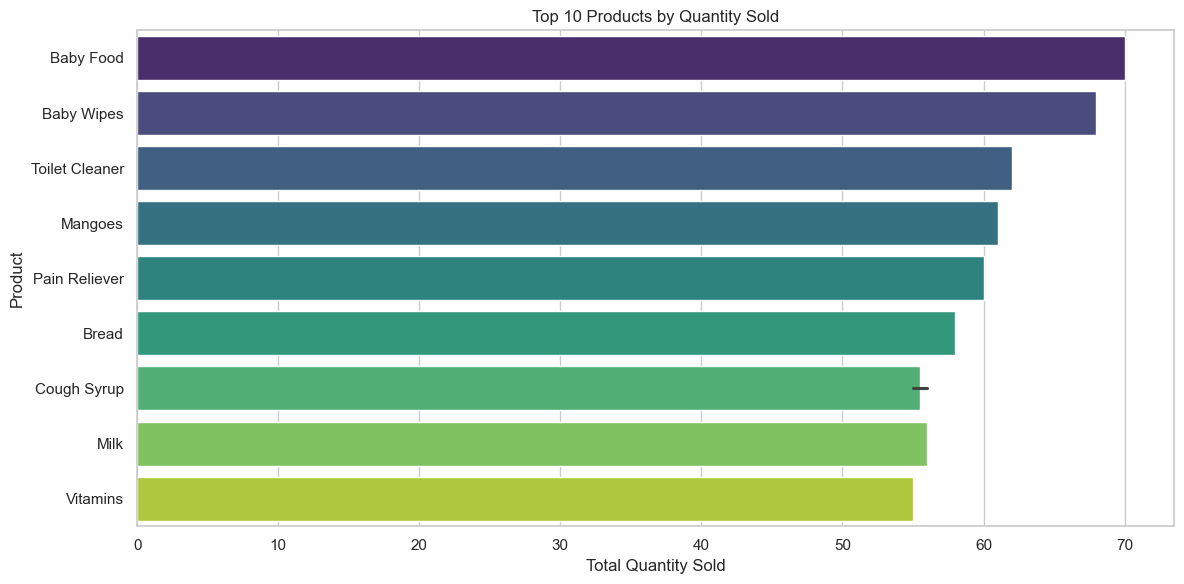

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_qty_named, x='quantity', y='product_name', palette='viridis')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


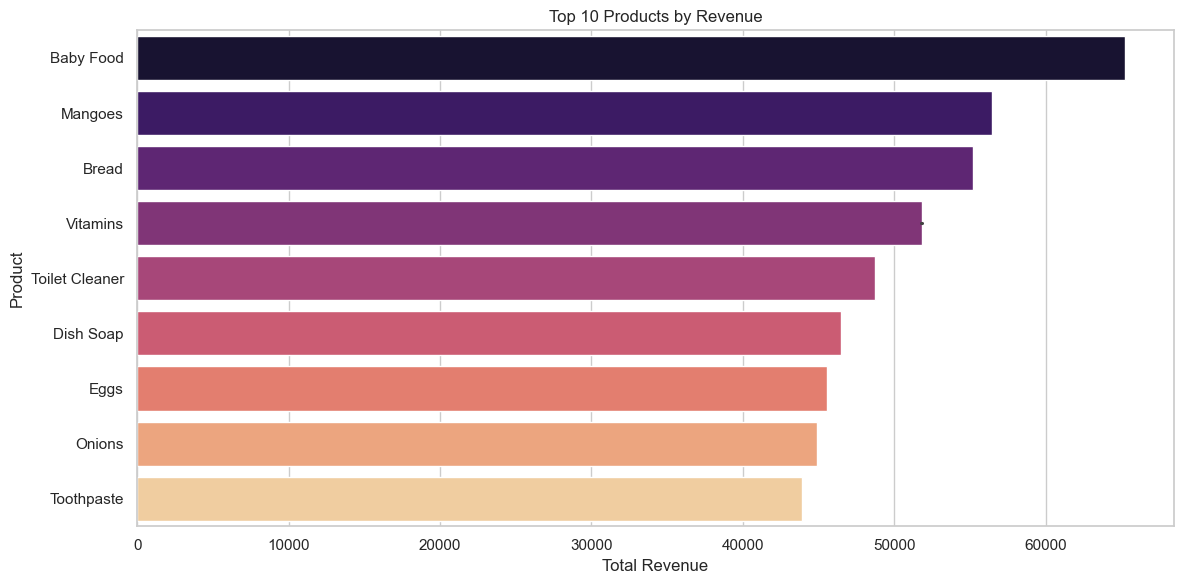

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rev_named, x='item_total', y='product_name', palette='magma')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [27]:
# Merge merged_df with products to get category
merged_with_products = pd.merge(merged_df, products, on='product_id', how='left')
merged_with_products[['product_id', 'product_name', 'category', 'quantity', 'item_total']].head()


,product_id,product_name,category,quantity,item_total
0,642612,Pet Treats,Pet Care,3,1551.09
1,378676,Orange Juice,Cold Drinks & Juices,1,881.42
2,741341,Eggs,Dairy & Breakfast,2,1847.68
3,561860,Orange Juice,Cold Drinks & Juices,1,874.78
4,602241,Nuts,Snacks & Munchies,2,1953.10


In [28]:
# Group by category to get total quantity sold and revenue
category_sales = merged_with_products.groupby('category').agg({
    'quantity': 'sum',
    'item_total': 'sum'
}).sort_values(by='item_total', ascending=False).reset_index()

category_sales.head()


,category,quantity,item_total
0,Dairy & Breakfast,1114,639222.19
1,Pharmacy,973,592368.57
2,Fruits & Vegetables,966,559053.08
3,Pet Care,1003,539888.75
4,Household Care,1078,444244.25


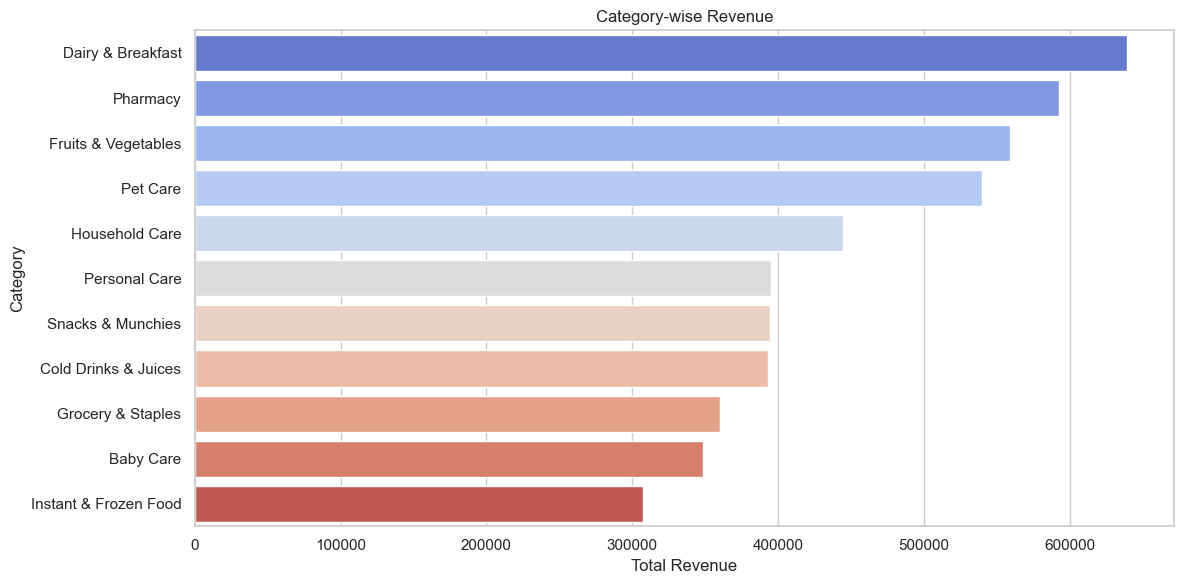

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='item_total', y='category', palette='coolwarm')
plt.title("Category-wise Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [53]:
customers.head()
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2500 non-null   int64  
 1   customer_name      2500 non-null   object 
 2   email              2500 non-null   object 
 3   phone              2500 non-null   int64  
 4   address            2500 non-null   object 
 5   area               2500 non-null   object 
 6   pincode            2500 non-null   int64  
 7   registration_date  2500 non-null   object 
 8   customer_segment   2500 non-null   object 
 9   total_orders       2500 non-null   int64  
 10  avg_order_value    2500 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 215.0+ KB


In [54]:
print(customers.columns)
customers.head()



Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


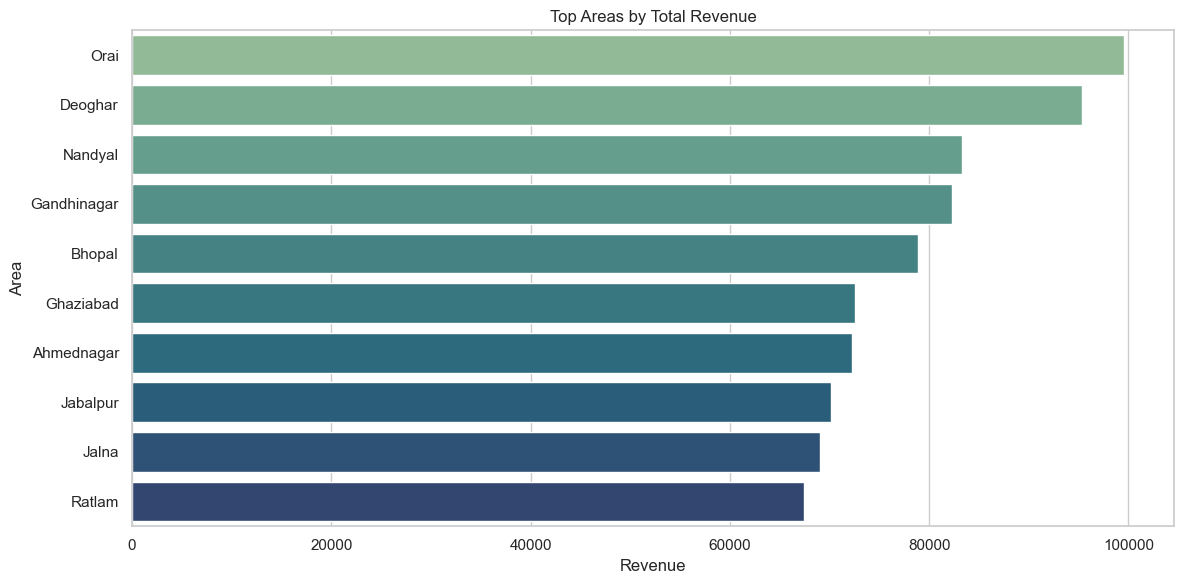

In [42]:
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

area_sales = orders_customers.groupby('area')['order_total'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=area_sales, x='order_total', y='area', palette='crest')
plt.title("Top Areas by Total Revenue")
plt.xlabel("Revenue")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


In [55]:
#Calculate actual delivery time (in minutes)
orders['delivery_time_mins'] = (orders['actual_delivery_time'] - orders['order_date']).dt.total_seconds() / 60

#Calculate promised time in mins (same logic)
orders['promised_time_mins'] = (orders['promised_delivery_time'] - orders['order_date']).dt.total_seconds() / 60

#On-time = delivered earlier or on time
orders['on_time'] = orders['actual_delivery_time'] <= orders['promised_delivery_time']

orders[['order_id', 'delivery_time_mins', 'promised_time_mins', 'on_time']].head()


,order_id,delivery_time_mins,promised_time_mins,on_time
0,1961864118,13.0,18.0,True
1,1549769649,13.0,11.0,False
2,9185164487,22.0,18.0,False
3,9644738826,17.0,18.0,True
4,5427684290,18.0,17.0,False


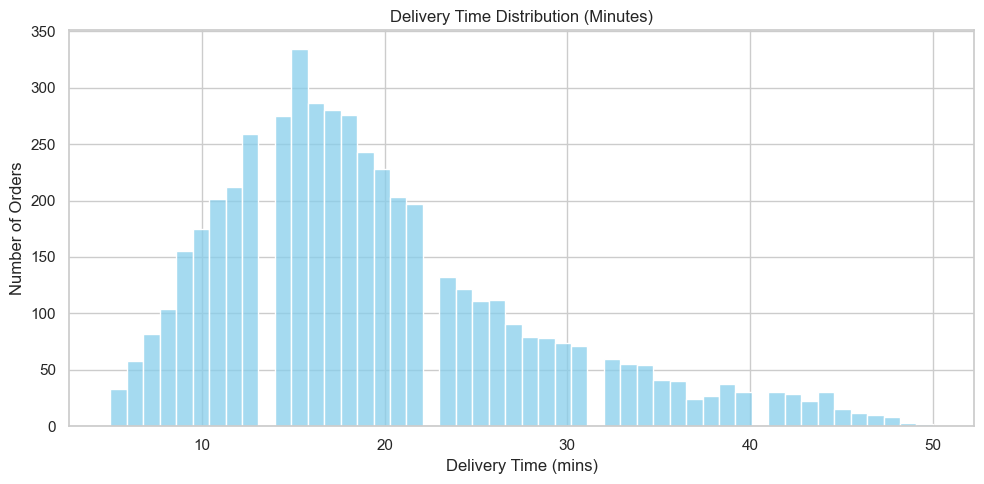

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(orders['delivery_time_mins'], bins=50, color='skyblue')
plt.title("Delivery Time Distribution (Minutes)")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [57]:
on_time_count = orders['on_time'].sum()
total_orders = orders.shape[0]
on_time_rate = round((on_time_count / total_orders) * 100, 2)

print(f"On-Time Delivery Rate: {on_time_rate}% ({on_time_count}/{total_orders}) orders delivered on time")


On-Time Delivery Rate: 38.04% (1902/5000) orders delivered on time


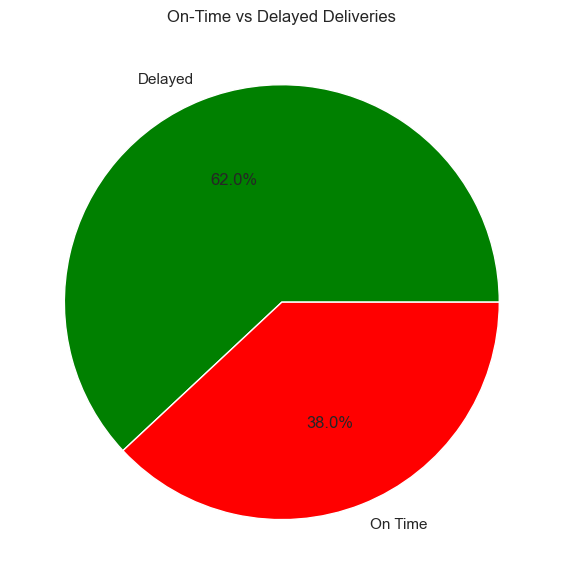

In [58]:
on_time_stats = orders['on_time'].value_counts().rename({True: 'On Time', False: 'Delayed'})

plt.figure(figsize=(6, 6))
plt.pie(on_time_stats, labels=on_time_stats.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("On-Time vs Delayed Deliveries")
plt.tight_layout()
plt.show()


In [59]:
feedback.head()
feedback.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


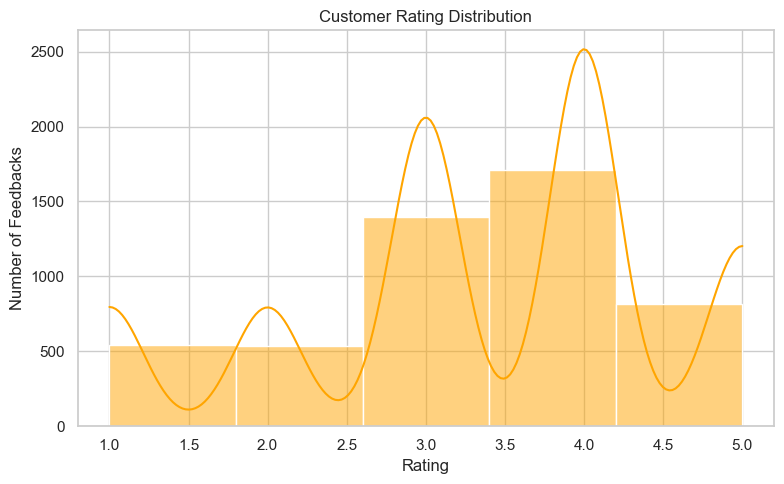

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(feedback['rating'], bins=5, kde=True, color='orange')
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Feedbacks")
plt.tight_layout()
plt.show()


In [62]:
marketing.head()
marketing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_id        5400 non-null   int64  
 1   campaign_name      5400 non-null   object 
 2   date               5400 non-null   object 
 3   target_audience    5400 non-null   object 
 4   channel            5400 non-null   object 
 5   impressions        5400 non-null   int64  
 6   clicks             5400 non-null   int64  
 7   conversions        5400 non-null   int64  
 8   spend              5400 non-null   float64
 9   revenue_generated  5400 non-null   float64
 10  roas               5400 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 464.2+ KB


In [65]:
marketing['CTR (%)'] = (marketing['clicks'] / marketing['impressions']) * 100
marketing['Conversion Rate (%)'] = (marketing['conversions'] / marketing['clicks']) * 100
marketing['Cost per Conversion'] = marketing['spend'] / marketing['conversions']


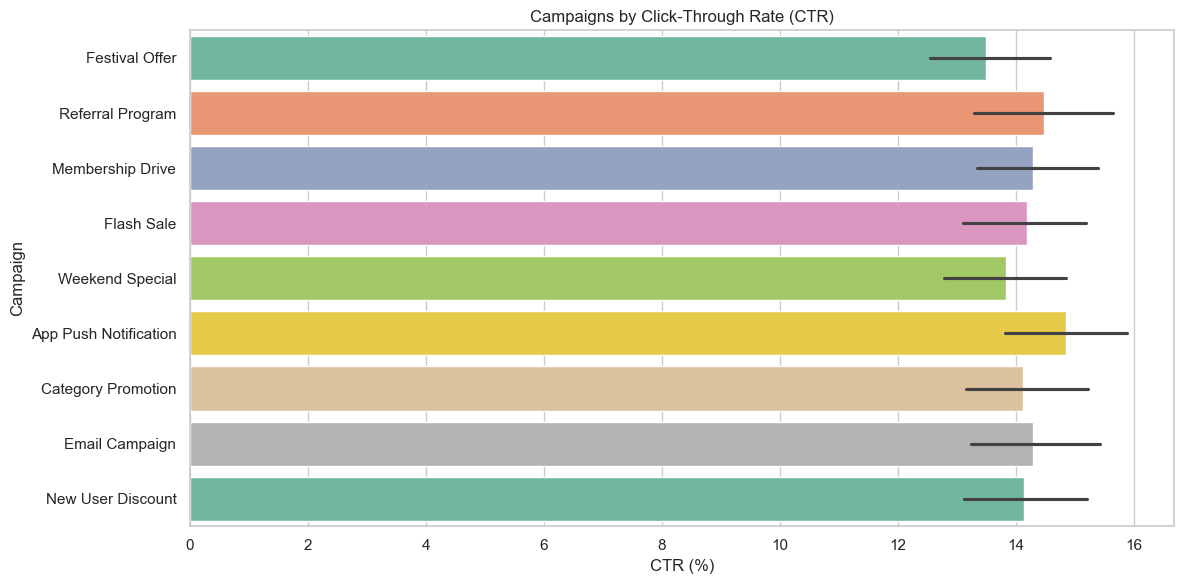

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=marketing.sort_values('CTR (%)', ascending=False), 
            x='CTR (%)', y='campaign_name', palette='Set2')

plt.title("Campaigns by Click-Through Rate (CTR)")
plt.xlabel("CTR (%)")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()


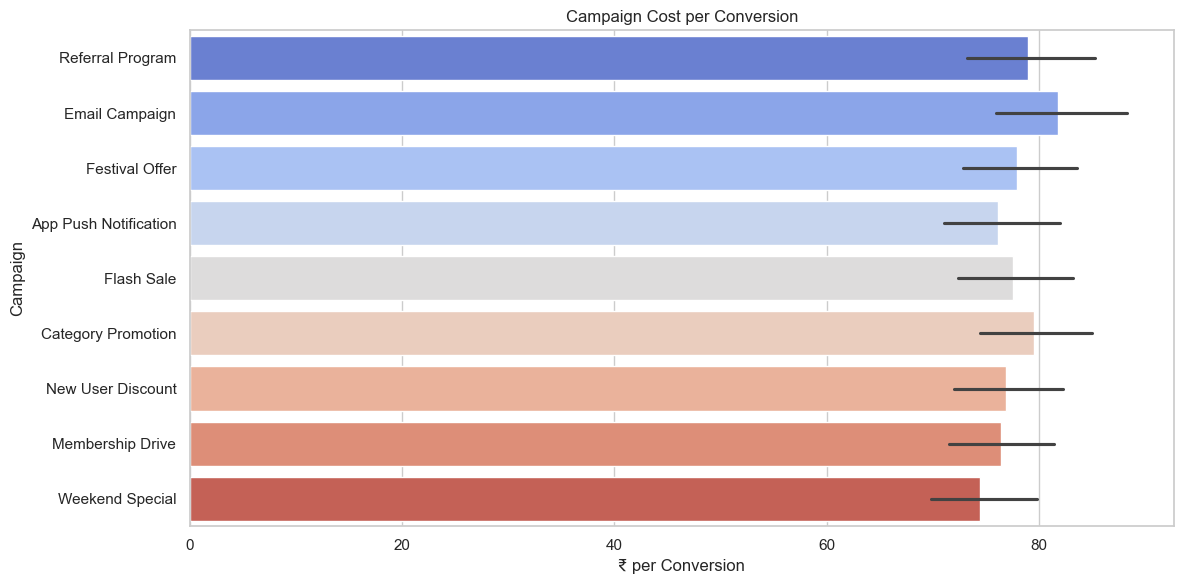

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=marketing.sort_values('Cost per Conversion'), 
            x='Cost per Conversion', y='campaign_name', palette='coolwarm')

plt.title("Campaign Cost per Conversion")
plt.xlabel("₹ per Conversion")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()
